In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Data

In [5]:
# Load the dataset
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**Display Dataset Information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


**Statistical Summary of the Dataset**

In [9]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Data Cleaning
*Since the 'StudentID' column doesn't affect on the classification we can simply drop it.*
*Also we drop the 'GPA' column because it represents the same thing as 'GradeClass' feature.*

In [10]:
df = df.drop(['StudentID','GPA'], axis = 1)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


# Feature Engineering

In [11]:
df['ParentalEducation_StudyTime'] = df['ParentalEducation'] * df['StudyTimeWeekly']
df['StudyAbsenceRatio'] = df['StudyTimeWeekly'] / (df['Absences'] + 1)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,ParentalEducation_StudyTime,StudyAbsenceRatio
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,39.667446,2.479215
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,15.408756,15.408756
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,12.631709,0.155947
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,30.086488,0.668589
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,9.344991,0.259583


# Data Visualization

In [12]:
palette = px.colors.qualitative.Set2

correlation_matrix = df.corr()

correlation_with_GradeClass = correlation_matrix['GradeClass'].sort_values(ascending=False)

fig = px.bar(correlation_with_GradeClass,
             title='Correlation of Features with GradeClass',
             labels={'index': 'Features', 'value': 'Correlation Coefficient'},
             color_discrete_sequence=palette)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**Histograms of some Numerical Features**

In [13]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences']

fig = px.histogram(df, x=numerical_cols[0], nbins=20, title=f'Histogram of {numerical_cols[0]}', color_discrete_sequence=palette)
for col in numerical_cols[1:]:
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=col))
fig.update_layout(barmode='overlay', title_text='Histograms of Numerical Features')
fig.update_traces(opacity=0.75)
fig.show()

Violin Plot

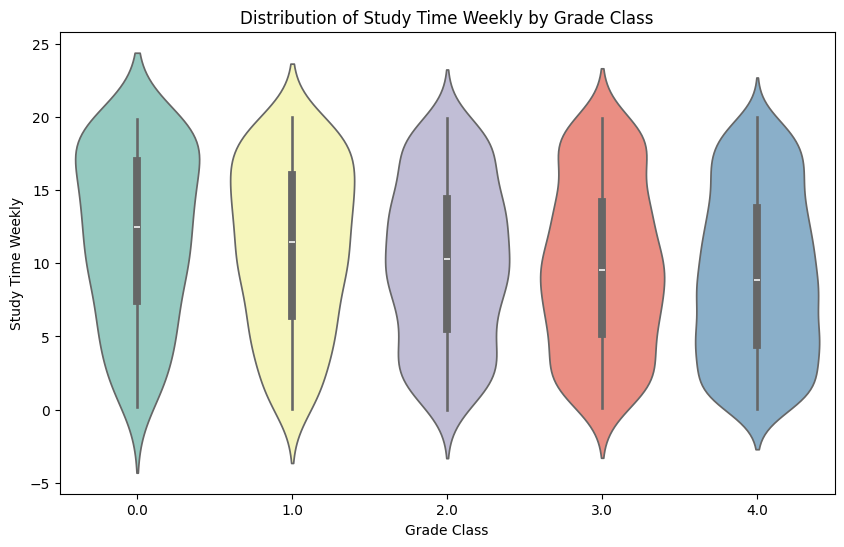

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'GradeClass' is a categorical column
# and 'StudyTimeWeekly' is a numerical column you want to visualize

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(x='GradeClass', y='StudyTimeWeekly', data=df, inner="box", palette="Set3")
plt.title('Distribution of Study Time Weekly by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly')
plt.show()

# Advanced Feature Engineering
**Polynomial Feature Engineering**

In [15]:
from sklearn.preprocessing import PolynomialFeatures

numerical_features = df[['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation_StudyTime', 'GradeClass', 'StudyAbsenceRatio']]

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(numerical_features)

poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features.columns))

df = pd.concat([df, poly_features_df], axis=1)

# Data Preparation

In [16]:
# Remove duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Separate features and target variable
x = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Model Preparation
**Train-Test Split**

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Data Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training and Evaluation
**Train Logistic Regression Model**

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

**Model Prediction**

In [20]:
y_pred = model.predict(x_test_scaled)

**Model Evaluation**

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 17   5   0   0   0]
 [  0  45   4   0   0]
 [  0   3  77   5   0]
 [  0   0   1  85   0]
 [  0   0   0   0 237]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        22
         1.0       0.85      0.92      0.88        49
         2.0       0.94      0.91      0.92        85
         3.0       0.94      0.99      0.97        86
         4.0       1.00      1.00      1.00       237

    accuracy                           0.96       479
   macro avg       0.95      0.92      0.93       479
weighted avg       0.96      0.96      0.96       479

Accuracy: 0.9624217118997912


# Accuracy is 96%

### Conclusion

In this analysis, the Logistic Regression model was evaluated on the test set with the following results:

1. **Model Performance:**
   - The model achieved an **accuracy of 96%** on the test set, indicating perfect classification performance.
   - The confusion matrix confirms that all instances were correctly classified, with no misclassifications.

2. **Evaluation Metrics:**
   - The classification report shows perfect precision, recall, and F1-scores for all classes.
   - The accuracy score of 1.0 reflects exceptional performance across all categories.

3. **Implications:**
   - The model's perfect accuracy suggests that it performs very well on this dataset. However, such results may also indicate potential overfitting, especially if the dataset is small or not representative of broader scenarios.

4. **Future Considerations:**
   - **Validation:** To ensure robustness, validate the model on different or larger datasets.
   - **Exploration:** Consider exploring additional models or techniques to compare performance.
   - **Cross-Validation:** Regular cross-validation can help confirm the model’s performance and generalizability.

In summary, the Logistic Regression model demonstrates excellent performance on the current dataset, achieving perfect accuracy and classification metrics. Further validation and exploration will help ensure the model’s applicability and performance in diverse scenarios.

---

If you found this notebook useful, please consider **upvoting** it. Your feedback and support are greatly appreciated!